In [1]:
# Local
%cd ..
%cd src
import stm_trusssystem as TS
import stm_methods as Methods
# Global
import numpy as np
import math
import matplotlib.pyplot as plt

/Users/karinyu/Documents/GitHub/StrutandTieModelling
/Users/karinyu/Documents/GitHub/StrutandTieModelling/src


# Example of a simply supported beam

In [2]:
# Define parameters
L = 10000 # mm
h = 4000 # mm
# Reinforcement material
Es = 205000 # MPa
fsy = 435 # MPa
eps_sy = fsy/Es
ds = 1
# Concrete material
Ec = 30000 # MPa
fck = 30 # MPa
eps_c = 0.003
dc = -1
# Load
F = 10000 # N

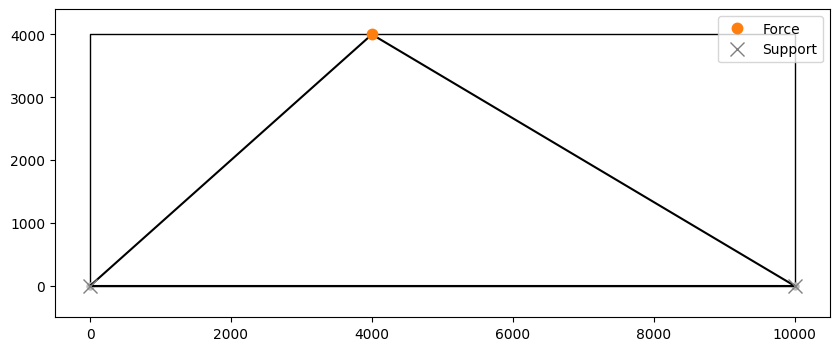

In [3]:
# Define points
# Generate Points
P1 = TS.Point(x = 0, y = 0, z = 0) 
P2 = TS.Point(x = L, y = 0, z = 0)
P3 = TS.Point(x = L, y = h, z = 0)
P4 = TS.Point(x = 0, y = h, z = 0)
# Load Introduction
P5 = TS.Point(x = 0.4*L, y = h, z = 0)
# Add. Nodes
P6 = TS.Point(x = 0.7*L, y = 0,z = 0)
P7 = TS.Point(x = 0.7*L, y = h,z = 0)
# Material
matT = TS.Material(Es,fsy,eps_sy,ds)
matC = TS.Material(Ec,fck,eps_c,dc)
DOF0 = TS.DOF(0,0,0,0,0,0)
# Generate Nodes
N1 = TS.Node(P1,DOF0)
N2 = TS.Node(P2,DOF0)
N3 = TS.Node(P3,DOF0)
N4 = TS.Node(P4,DOF0)
N5 = TS.Node(P5,DOF0)
N6 = TS.Node(P6,DOF0)
N7 = TS.Node(P7,DOF0)
S1 = TS.Support(N1, TS.DOF(1,1,1,0,0,0)) # fixed support
S2 = TS.Support(N2, TS.DOF(0,1,0,0,0,0)) # roller support
# Polygon, in clockwise direction, assumed to be in one plane
Polygon = TS.Polygon()
Polygon.addPoint([P1, P4, P3, P2])
Truss = TS.TrussSystem()
# Search Space - CLOCKWISE
Truss.addPolygontoSS(Polygon)
# add Nodes
Truss.addNode([N1, N2, N5])
# add Edges
e1 = TS.Edge(N1, N5, matT)
e2 = TS.Edge(N5, N2, matC)
e3 = TS.Edge(N2, N1, matC)
Truss.addMaterial(matT)
Truss.addMaterial(matC)
Truss.addEdge([e1,e2,e3])
# add Force
Force1 = TS.Force_ext(N5, [0,-1*F,0,0,0,0], direc_Force = TS.DOF(0,1,0,0,0,0))
Truss.addForce(Force1)
# add Supports
Truss.addSupport(S1)
Truss.addSupport(S2)
# plot truss without solving the system yet
Truss.plotSTM(fig_size=(10,4))
# orange dots indicate locations of acting forces
# grey dots indicate restrained node

In [4]:
# solve the system
Truss.solveTruss(update=True) # updates the area and forces
# check equilibrium
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())

Is strut-and-tie model in equilibrium?  True


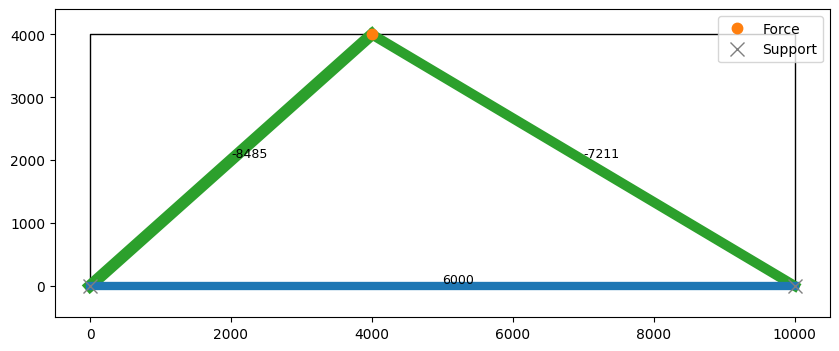

In [5]:
Truss.plotSTM(fig_size=(10,4), without_forces=False, plot_scale=1e3, label_edges = True) # to include the force labels in the selected unit add label_edges = True

In [6]:
# Modify truss and add two additional nodes
Truss.removeEdge(e2)
Truss.removeEdge(e3)
# add new nodes
Truss.addNode([N6, N7])
Truss.addEdge([TS.Edge(N5, N6, matT)])
Truss.addEdge([TS.Edge(N5, N7, matC)])
Truss.addEdge([TS.Edge(N7, N6, matT)])
Truss.addEdge([TS.Edge(N7, N2, matC)])
Truss.addEdge([TS.Edge(N2, N6, matC)])
Truss.addEdge([TS.Edge(N6, N1, matT)])
Truss.solveTruss(update = True)

In [7]:
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())

Is strut-and-tie model in equilibrium?  True


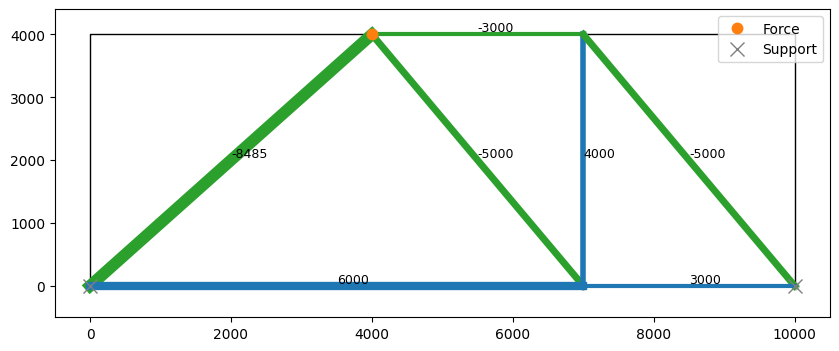

In [8]:
Truss.plotSTM(fig_size=(10,4), plot_scale=1e3, label_edges = True)

In [9]:
# Modify nodal locations
P5_new = TS.Point(x = 0.35*L, y = h, z = 0)
Truss.changeNodePosition(P5, P5_new)
Truss.solveTruss(update = True)

Is strut-and-tie model in equilibrium?  True


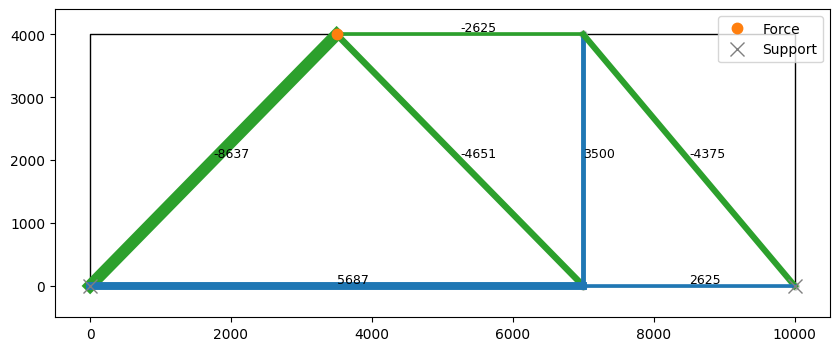

In [10]:
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())
Truss.plotSTM(fig_size = (10,4), plot_scale=1e3, label_edges = True)

In [11]:
# Modify nodal locations
P6_new = TS.Point(x = 0.8*L, y = 0.2*h, z = 0)
Truss.changeNodePosition(P6, P6_new)
Truss.solveTruss(update = True)

Is strut-and-tie model in equilibrium?  True


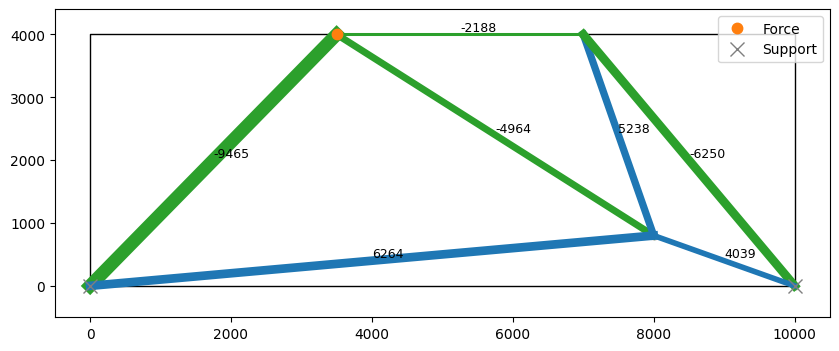

In [12]:
print('Is strut-and-tie model in equilibrium? ', Truss.checkEquilibrium())
Truss.plotSTM(fig_size = (10,4), plot_scale=1e3, label_edges = True)